In [215]:
#importing necessary libraries..
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import math

In [216]:
#loading training data..

X = np.loadtxt('/Users/sidharthagarwal/Desktop/assignments/ml774/data/q4/q4x.dat')
Y_str = np.loadtxt('/Users/sidharthagarwal/Desktop/assignments/ml774/data/q4/q4y.dat',dtype = str)

Y = []
for idx in range(Y_str.shape[0]):
    if Y_str[idx]=="Alaska":
        Y.append(float(1))
    else:
        Y.append(float(0))

Y = np.expand_dims(np.array(Y),axis = 1)

# Note Alaska is 1 and Canada is 0.

In [217]:
# normalizing the data..
mean = np.mean(X,axis = 0)
std  = np.std(X,axis = 0)

X = X - mean
X = X/std

In [218]:
# calculation of linear parameters

phi = np.sum([Y==1])/Y.shape[0]

def returnMean(X,Y,thisClass):
    thisSum  = np.zeros(X[0].shape[0])
    thisFreq = 0
    
    for idx in range(Y.shape[0]):
        if Y[idx][0]==thisClass:
            thisSum += X[idx]
            thisFreq += 1
    
    return thisSum/thisFreq

mean0 = np.expand_dims(returnMean(X,Y,0),axis = 0)
mean1 = np.expand_dims(returnMean(X,Y,1),axis = 0)

def covariance(X,Y):
    cov = np.zeros((X[0].shape[0],X[0].shape[0]))
    
    for idx in range(Y.shape[0]):
        
        thisX = np.expand_dims(X[idx],axis = 0)
        
        if(Y[idx][0]==1):
            cov += np.dot((thisX-mean1).transpose(),(thisX-mean1))
        else:
            cov += np.dot((thisX-mean0).transpose(),(thisX-mean0))
    
    return cov/X.shape[0]

def class_cov(X,Y,thisClass):
    cov = np.zeros((X[0].shape[0],X[0].shape[0]))
    thisSamples = 0
    
    if(thisClass==1):
        thisMean = mean1
    else:
        thisMean = mean0

    for idx in range(Y.shape[0]):
        
        thisX = np.expand_dims(X[idx],axis = 0)
        
        if(Y[idx]==thisClass):
            cov += np.dot((thisX-thisMean).transpose(),(thisX-thisMean))
            thisSamples += 1
    
    return cov/thisSamples

covCommon = covariance(X,Y)
cov0 = class_cov(X,Y,0)
cov1 = class_cov(X,Y,1)

print("Mean0: "+str(mean0))
print("Mean1: "+str(mean1))
print("Common Cov: "+str(covCommon))
print("Covar0: "+str(cov0))
print("Covar1: "+str(cov1))

Mean0: [[ 0.75529433 -0.68509431]]
Mean1: [[-0.75529433  0.68509431]]
Common Cov: [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]
Covar0: [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]
Covar1: [[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]


Text(0.5, 1.0, 'GDA')

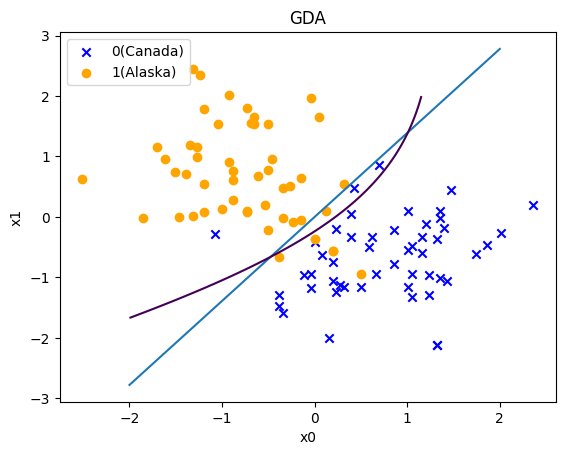

In [222]:
# plotting the graph..

y0 = []
x10 = []
x20 = []

y1 = []
x11 = []
x21 = []

for idx in range(X.shape[0]):
    if Y[idx][0] == 0:
        y0.append(idx)
        x10.append(X[idx][0])
        x20.append(X[idx][1])
    else:
        y1.append(idx)
        x11.append(X[idx][0])
        x21.append(X[idx][1])

plt.scatter(x10,x20,color = "blue",marker = "x",label = '0(Canada)')
plt.scatter(x11,x21,color = "orange" ,marker = "o",label = '1(Alaska)')

#plotting the linear GDA
covCommInv = np.linalg.inv(covCommon)
slope = np.dot(covCommInv,(mean1 - mean0).transpose())
intercept = math.log((phi)/(1-phi)) - (np.dot(np.dot(mean1,covCommInv),mean1.transpose()) - np.dot(np.dot(mean0,covCommInv),mean0.transpose()))/2

x_lin = np.expand_dims(np.linspace(-2,2,100),axis = 1)
y_lin   = (-1*x_values*slope[0])/slope[1] - intercept/slope[1]

plt.plot(x_lin, y_lin)


# for plotting the quadratic GDA
xq0 = np.linspace(-2,2,100)
xq1 = np.linspace(-2,2,100)
xq0,xq1 = np.meshgrid(xq0,xq1)
z = np.zeros(xq1.shape)

quad_intercept = math.log(phi/(1-phi)) - np.log(np.linalg.det(cov1))/2 + np.log(np.linalg.det(cov0))/2

for idx in range(z.shape[0]):
    for jdx in range(z.shape[1]):
        x_this = np.array([[xq1[idx][jdx],xq0[idx][jdx]]])
        z[idx][jdx] = np.dot(np.dot(x_this-mean0,cov0),(x_this - mean0).transpose()) + intercept
        z[idx][jdx] -= np.dot(np.dot(x_this-mean1,cov1),(x_this-mean1).transpose())

plt.contour(xq0,xq1,z,levels = [0])
        
plt.legend()

plt.xlabel("x0")
plt.ylabel("x1")
plt.title("GDA")